In [1]:
# Setup folder structure for the web crawling agent
import os
import sys

# Create main directory structure
directories = [
    'ai_fraud_detector',
    'ai_fraud_detector/crawlers',
    'ai_fraud_detector/parsers',
    'ai_fraud_detector/analyzers',
    'ai_fraud_detector/database',
    'ai_fraud_detector/utils',
    'ai_fraud_detector/config',
    'ai_fraud_detector/reports'
]

# Create directories
for directory in directories:
    os.makedirs(directory, exist_ok=True)
    # Create __init__.py files
    with open(os.path.join(directory, '__init__.py'), 'w') as f:
        f.write('')

print("Folder structure created successfully!")
print("\nDirectory Structure:")
for root, dirs, files in os.walk('ai_fraud_detector'):
    level = root.replace('ai_fraud_detector', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files:
        if file.endswith('.py'):
            print(f'{subindent}{file}')

Folder structure created successfully!

Directory Structure:
ai_fraud_detector/
  __init__.py
  config/
    __init__.py
  database/
    __init__.py
  crawlers/
    __init__.py
  parsers/
    __init__.py
  reports/
    __init__.py
  analyzers/
    __init__.py
  utils/
    __init__.py


In [2]:
# Install required packages
!pip install beautifulsoup4 requests selenium newspaper3k pandas numpy
!pip install scikit-learn transformers torch torchvision
!pip install aiohttp asyncio schedule email-validator
!pip install googlesearch-python lxml html5lib
!pip install python-dotenv

# For Colab specific installations
!apt-get update
!apt-get install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

print("All dependencies installed!")

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 53.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.0/512.0 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.6/131.6 kB 11.5 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13540 sha256=0d224019a4813abf796e13981cb0e438f10c6e0cf4892f4aee29f239357ea089
  Stored in directory: /root/.cache/p

In [3]:
# config/config.py
config_content = '''
import os
from datetime import datetime
from dotenv import load_dotenv

load_dotenv()

class Config:
    # Email Configuration
    SMTP_SERVER = os.getenv('SMTP_SERVER', 'smtp.gmail.com')
    SMTP_PORT = int(os.getenv('SMTP_PORT', 587))
    EMAIL_SENDER = os.getenv('EMAIL_SENDER', '')
    EMAIL_PASSWORD = os.getenv('EMAIL_PASSWORD', '')
    EMAIL_RECIPIENT = os.getenv('EMAIL_RECIPIENT', '')

    # Crawling Configuration
    MAX_CRAWL_DEPTH = 3
    MAX_PAGES_PER_DOMAIN = 50
    CRAWL_DELAY = 1  # seconds between requests
    USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"

    # Fraud Detection Configuration
    AI_DETECTION_THRESHOLD = 0.85  # Confidence threshold
    MIN_CONTENT_LENGTH = 100  # Minimum characters to analyze

    # Keywords for fraud detection
    FRAUD_KEYWORDS = [
        'investment scam', 'crypto fraud', 'fake news',
        'phishing', 'identity theft', 'ponzi scheme',
        'fake giveaway', 'money flipping', 'advance fee',
        'romance scam', 'fake job offer', 'lottery scam'
    ]

    # Target sources (can be expanded)
    NEWS_SOURCES = [
        'https://news.google.com',
        'https://www.reuters.com',
        'https://apnews.com',
        'https://www.bbc.com/news'
    ]

    SOCIAL_MEDIA_PATTERNS = [
        'twitter.com', 'facebook.com', 'reddit.com',
        'linkedin.com', 'instagram.com'
    ]

    # Database
    DB_PATH = 'ai_fraud_detector/database/fraud_cases.db'

    # Scheduling
    DAILY_RUN_TIME = "09:00"  # Run daily at 9 AM
'''

with open('ai_fraud_detector/config/config.py', 'w') as f:
    f.write(config_content)

# config/__init__.py
with open('ai_fraud_detector/config/__init__.py', 'w') as f:
    f.write('')

print("Configuration files created!")

Configuration files created!


In [6]:
# database/database_manager.py
db_content = """
import sqlite3
import json
from datetime import datetime
from typing import Dict, List, Any
import pandas as pd

class DatabaseManager:
    def __init__(self, db_path: str):
        self.db_path = db_path
        self.init_database()

    def init_database(self):
        '''Initialize database with required tables'''
        conn = sqlite3.connect(self.db_path)
        cursor = conn.cursor()

        # Create fraud cases table
        cursor.execute(\"\"\"
            CREATE TABLE IF NOT EXISTS fraud_cases (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                url TEXT UNIQUE,
                title TEXT,
                content TEXT,
                ai_probability REAL,
                fraud_type TEXT,
                detected_date TIMESTAMP,
                source_domain TEXT,
                keywords_found TEXT,
                screenshot_path TEXT,
                is_verified BOOLEAN DEFAULT 0,
                reported_date TIMESTAMP
            )
        \"\"\")

        # Create crawling history table
        cursor.execute(\"\"\"
            CREATE TABLE IF NOT EXISTS crawl_history (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                url TEXT,
                domain TEXT,
                crawl_date TIMESTAMP,
                status TEXT,
                pages_crawled INTEGER
            )
        \"\"\")

        conn.commit()
        conn.close()

    def save_fraud_case(self, fraud_data: Dict[str, Any]):
        '''Save detected fraud case to database'''
        conn = sqlite3.connect(self.db_path)
        cursor = conn.cursor()

        cursor.execute(\"\"\"
            INSERT OR REPLACE INTO fraud_cases
            (url, title, content, ai_probability, fraud_type,
             detected_date, source_domain, keywords_found)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        \"\"\", (
            fraud_data['url'],
            fraud_data.get('title', ''),
            fraud_data.get('content', ''),
            fraud_data.get('ai_probability', 0),
            fraud_data.get('fraud_type', 'unknown'),
            datetime.now(),
            fraud_data.get('source_domain', ''),
            json.dumps(fraud_data.get('keywords_found', []))
        ))

        conn.commit()
        conn.close()

    def get_unreported_cases(self) -> List[Dict[str, Any]]:
        '''Get all fraud cases that haven't been reported'''
        conn = sqlite3.connect(self.db_path)
        conn.row_factory = sqlite3.Row
        cursor = conn.cursor()

        cursor.execute(\"\"\"
            SELECT * FROM fraud_cases
            WHERE reported_date IS NULL
            ORDER BY detected_date DESC
        \"\"\")

        rows = cursor.fetchall()
        conn.close()

        return [dict(row) for row in rows]

    def mark_as_reported(self, case_ids: List[int]):
        '''Mark cases as reported'''
        conn = sqlite3.connect(self.db_path)
        cursor = conn.cursor()

        placeholders = ','.join(['?'] * len(case_ids))
        cursor.execute(f\"\"\"
            UPDATE fraud_cases
            SET reported_date = ?
            WHERE id IN ({placeholders})
        \"\"\", [datetime.now()] + case_ids)

        conn.commit()
        conn.close()

    def get_daily_summary(self) -> Dict[str, Any]:
        '''Get summary of today's findings'''
        conn = sqlite3.connect(self.db_path)
        cursor = conn.cursor()

        today = datetime.now().strftime('%Y-%m-%d')

        cursor.execute(\"\"\"
            SELECT
                COUNT(*) as total_cases,
                AVG(ai_probability) as avg_ai_probability,
                fraud_type,
                COUNT(*) as type_count
            FROM fraud_cases
            WHERE DATE(detected_date) = ?
            GROUP BY fraud_type
        \"\"\", (today,))

        results = cursor.fetchall()
        conn.close()

        return {
            'date': today,
            'total_cases': results[0][0] if results else 0,
            'breakdown': [{'type': r[2], 'count': r[3]} for r in results]
        }
"""

with open('ai_fraud_detector/database/database_manager.py', 'w') as f:
    f.write(db_content)

# database/__init__.py
with open('ai_fraud_detector/database/__init__.py', 'w') as f:
    f.write('from .database_manager import DatabaseManager')

print("Database module created!")

Database module created!


In [7]:
# analyzers/ai_detector.py
ai_detector_content = '''
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple
import re
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch

class AIDetector:
    def __init__(self):
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.load_models()
        self.setup_patterns()

    def load_models(self):
        """Load AI detection models"""
        try:
            # Using a lightweight model for AI text detection
            self.tokenizer = AutoTokenizer.from_pretrained("roberta-base")
            # Note: You would need a fine-tuned model for AI detection
            # For now, we'll use heuristic methods
        except:
            print("Could not load transformer model, using heuristic methods only")
            self.tokenizer = None

    def setup_patterns(self):
        """Setup patterns for AI-generated content detection"""
        self.ai_patterns = [
            # Repetitive patterns
            (r'\\b(?:however|moreover|furthermore|consequently)\\b', 0.1),
            # Overly formal language
            (r'\\b(?:it is important to note|as previously mentioned|in conclusion)\\b', 0.2),
            # Lack of personal pronouns
            (r'\\b(?:I|we|my|our|me|us)\\b', -0.1),  # Negative weight for personal pronouns
            # Common AI phrases
            (r'\\b(?:as an AI|I am an AI|I cannot|I'm unable to)\\b', 0.8),
            # Perfect grammar patterns
            (r'(?:\\.\\s*[A-Z][^.]{50,200}\\.){3,}', 0.3),  # Multiple long, perfectly structured sentences
        ]

        self.fraud_patterns = [
            (r'\\b(?:guaranteed|risk-free|limited time|act now|click here)\\b', 0.3),
            (r'\\b(?:bitcoin|crypto|investment|return|profit)\\b.*\\b(?:urgent|immediate)\\b', 0.4),
            (r'\\b(?:free money|giveaway|win|prize|lottery)\\b.*\\b(?:pay|fee|charge)\\b', 0.6),
            (r'\\b(?:password|login|account|verify|confirm)\\b.*\\b(?:email|phone|bank)\\b', 0.5),
            (r'\\b(?:inheritance|funds transfer|million|billion)\\b.*\\b(?:help|assistance)\\b', 0.5),
        ]

    def analyze_text(self, text: str) -> Dict[str, float]:
        """Analyze text for AI generation probability and fraud indicators"""
        if len(text) < 100:
            return {'ai_probability': 0, 'fraud_probability': 0, 'confidence': 0}

        ai_score = self.detect_ai_patterns(text)
        fraud_score = self.detect_fraud_patterns(text)

        # Combine scores
        ai_probability = min(1.0, ai_score * 1.5)  # Scale to probability
        fraud_probability = min(1.0, fraud_score)

        # Calculate confidence based on text length and score
        confidence = min(1.0, len(text) / 1000) * max(ai_probability, fraud_probability)

        return {
            'ai_probability': round(ai_probability, 3),
            'fraud_probability': round(fraud_probability, 3),
            'confidence': round(confidence, 3),
            'is_ai_generated': ai_probability > 0.7,
            'is_fraud': fraud_probability > 0.6
        }

    def detect_ai_patterns(self, text: str) -> float:
        """Detect patterns indicative of AI-generated content"""
        score = 0
        text_lower = text.lower()

        for pattern, weight in self.ai_patterns:
            matches = re.findall(pattern, text_lower, re.IGNORECASE)
            score += len(matches) * weight

        # Additional heuristics
        sentences = re.split(r'[.!?]+', text)
        if sentences:
            # Check for uniform sentence length (common in AI text)
            sent_lengths = [len(s.split()) for s in sentences if len(s.split()) > 0]
            if len(sent_lengths) > 3:
                avg_length = np.mean(sent_lengths)
                std_length = np.std(sent_lengths)
                if std_length < avg_length * 0.3:  # Very uniform sentence lengths
                    score += 0.2

        return min(1.0, score)

    def detect_fraud_patterns(self, text: str) -> float:
        """Detect fraud-related patterns"""
        score = 0
        text_lower = text.lower()

        for pattern, weight in self.fraud_patterns:
            matches = re.findall(pattern, text_lower, re.IGNORECASE)
            score += len(matches) * weight

        # Check for urgency indicators
        urgency_words = ['urgent', 'immediate', 'now', 'today', 'limited', 'hurry']
        urgency_count = sum(1 for word in urgency_words if word in text_lower)
        score += urgency_count * 0.1

        # Check for financial references without clear context
        financial_terms = ['money', 'cash', 'payment', 'transfer', 'bank', 'account']
        financial_count = sum(1 for term in financial_terms if term in text_lower)
        if financial_count > 2 and 'price' not in text_lower and 'cost' not in text_lower:
            score += 0.2

        return min(1.0, score)

    def extract_keywords(self, text: str, keyword_list: List[str]) -> List[str]:
        """Extract relevant keywords from text"""
        found_keywords = []
        text_lower = text.lower()

        for keyword in keyword_list:
            if keyword.lower() in text_lower:
                found_keywords.append(keyword)

        return found_keywords
'''

with open('ai_fraud_detector/analyzers/ai_detector.py', 'w') as f:
    f.write(ai_detector_content)

# analyzers/__init__.py
with open('ai_fraud_detector/analyzers/__init__.py', 'w') as f:
    f.write('from .ai_detector import AIDetector')

print("AI Detector module created!")

AI Detector module created!


In [8]:
# crawlers/web_crawler.py
crawler_content = '''
import requests
from bs4 import BeautifulSoup
import time
import random
from urllib.parse import urlparse, urljoin
from typing import List, Dict, Set, Optional
import concurrent.futures
from newspaper import Article
import logging

class WebCrawler:
    def __init__(self, config):
        self.config = config
        self.visited_urls = set()
        self.session = requests.Session()
        self.session.headers.update({
            'User-Agent': config.USER_AGENT
        })
        self.setup_logging()

    def setup_logging(self):
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s'
        )
        self.logger = logging.getLogger(__name__)

    def crawl_url(self, url: str, max_depth: int = 3, max_pages: int = 50) -> List[Dict]:
        """
        Crawl a URL and extract content from linked pages
        """
        results = []
        urls_to_visit = [(url, 0)]  # (url, depth)
        visited = set()

        while urls_to_visit and len(results) < max_pages:
            current_url, depth = urls_to_visit.pop(0)

            if current_url in visited or depth > max_depth:
                continue

            visited.add(current_url)

            try:
                content = self.extract_content(current_url)
                if content and len(content.get('text', '')) > self.config.MIN_CONTENT_LENGTH:
                    results.append(content)
                    self.logger.info(f"Extracted content from {current_url}")

                # Get links for further crawling
                if depth < max_depth:
                    links = self.extract_links(current_url)
                    for link in links:
                        if link not in visited:
                            urls_to_visit.append((link, depth + 1))

                time.sleep(self.config.CRAWL_DELAY * random.uniform(0.5, 1.5))

            except Exception as e:
                self.logger.error(f"Error crawling {current_url}: {str(e)}")

        return results

    def extract_content(self, url: str) -> Optional[Dict]:
        """
        Extract content from a single URL using newspaper3k
        """
        try:
            article = Article(url)
            article.download()
            article.parse()

            return {
                'url': url,
                'title': article.title,
                'text': article.text,
                'summary': article.summary,
                'authors': article.authors,
                'publish_date': str(article.publish_date),
                'top_image': article.top_image,
                'keywords': article.keywords,
                'source_domain': urlparse(url).netloc
            }
        except Exception as e:
            self.logger.error(f"Error extracting content from {url}: {str(e)}")
            # Fallback to BeautifulSoup
            return self.extract_with_bs(url)

    def extract_with_bs(self, url: str) -> Optional[Dict]:
        """
        Fallback content extraction using BeautifulSoup
        """
        try:
            response = self.session.get(url, timeout=10)
            response.raise_for_status()

            soup = BeautifulSoup(response.content, 'html.parser')

            # Remove script and style elements
            for script in soup(["script", "style"]):
                script.decompose()

            # Get text
            text = soup.get_text(separator=' ', strip=True)

            # Get title
            title = soup.title.string if soup.title else ''

            # Get meta description
            description = ''
            meta_desc = soup.find('meta', attrs={'name': 'description'})
            if meta_desc:
                description = meta_desc.get('content', '')

            return {
                'url': url,
                'title': title,
                'text': text,
                'summary': description,
                'authors': [],
                'publish_date': '',
                'top_image': '',
                'keywords': [],
                'source_domain': urlparse(url).netloc
            }
        except Exception as e:
            self.logger.error(f"Error with BS extraction from {url}: {str(e)}")
            return None

    def extract_links(self, url: str) -> List[str]:
        """
        Extract all links from a page
        """
        try:
            response = self.session.get(url, timeout=10)
            response.raise_for_status()

            soup = BeautifulSoup(response.content, 'html.parser')
            base_domain = urlparse(url).netloc

            links = []
            for link in soup.find_all('a', href=True):
                href = link['href']
                absolute_url = urljoin(url, href)
                parsed_url = urlparse(absolute_url)

                # Filter out non-http links and external domains
                if parsed_url.scheme in ['http', 'https']:
                    if parsed_url.netloc == base_domain or parsed_url.netloc.endswith('.' + base_domain):
                        links.append(absolute_url)

            return list(set(links))[:20]  # Limit to 20 links
        except Exception as e:
            self.logger.error(f"Error extracting links from {url}: {str(e)}")
            return []

    def crawl_multiple_sources(self, sources: List[str]) -> List[Dict]:
        """
        Crawl multiple sources concurrently
        """
        all_results = []

        with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
            future_to_url = {
                executor.submit(self.crawl_url, source,
                              self.config.MAX_CRAWL_DEPTH,
                              self.config.MAX_PAGES_PER_DOMAIN): source
                for source in sources
            }

            for future in concurrent.futures.as_completed(future_to_url):
                source = future_to_url[future]
                try:
                    results = future.result()
                    all_results.extend(results)
                    self.logger.info(f"Crawled {source}: found {len(results)} pages")
                except Exception as e:
                    self.logger.error(f"Error crawling {source}: {str(e)}")

        return all_results
'''

with open('ai_fraud_detector/crawlers/web_crawler.py', 'w') as f:
    f.write(crawler_content)

# crawlers/__init__.py
with open('ai_fraud_detector/crawlers/__init__.py', 'w') as f:
    f.write('from .web_crawler import WebCrawler')

print("Web Crawler module created!")

Web Crawler module created!


In [9]:
# utils/email_reporter.py
email_content = '''
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
from datetime import datetime
import pandas as pd
from typing import List, Dict
import logging
import json

class EmailReporter:
    def __init__(self, config):
        self.config = config
        self.setup_logging()

    def setup_logging(self):
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s'
        )
        self.logger = logging.getLogger(__name__)

    def send_report(self, fraud_cases: List[Dict], summary: Dict = None):
        """
        Send email report with fraud cases
        """
        if not fraud_cases:
            self.logger.info("No fraud cases to report")
            return False

        try:
            # Create email
            msg = MIMEMultipart()
            msg['Subject'] = f'AI-Generated Fraud Report - {datetime.now().strftime("%Y-%m-%d")}'
            msg['From'] = self.config.EMAIL_SENDER
            msg['To'] = self.config.EMAIL_RECIPIENT

            # Create email body
            body = self.create_email_body(fraud_cases, summary)
            msg.attach(MIMEText(body, 'html'))

            # Attach CSV report
            csv_data = self.create_csv_report(fraud_cases)
            attachment = MIMEApplication(csv_data)
            attachment.add_header('Content-Disposition', 'attachment',
                                filename=f'fraud_report_{datetime.now().strftime("%Y%m%d")}.csv')
            msg.attach(attachment)

            # Send email
            with smtplib.SMTP(self.config.SMTP_SERVER, self.config.SMTP_PORT) as server:
                server.starttls()
                server.login(self.config.EMAIL_SENDER, self.config.EMAIL_PASSWORD)
                server.send_message(msg)

            self.logger.info(f"Email report sent with {len(fraud_cases)} cases")
            return True

        except Exception as e:
            self.logger.error(f"Error sending email: {str(e)}")
            return False

    def create_email_body(self, fraud_cases: List[Dict], summary: Dict = None) -> str:
        """
        Create HTML email body
        """
        today = datetime.now().strftime('%Y-%m-%d')

        html = f"""
        <!DOCTYPE html>
        <html>
        <head>
            <style>
                body {{ font-family: Arial, sans-serif; margin: 20px; }}
                .header {{ background-color: #f44336; color: white; padding: 20px; }}
                .case {{ border: 1px solid #ddd; margin: 10px 0; padding: 15px; }}
                .ai-high {{ background-color: #ffebee; }}
                .fraud-high {{ background-color: #fff3e0; }}
                .stats {{ background-color: #e8f5e8; padding: 15px; margin: 20px 0; }}
                table {{ width: 100%; border-collapse: collapse; }}
                th, td {{ border: 1px solid #ddd; padding: 8px; text-align: left; }}
                th {{ background-color: #4CAF50; color: white; }}
            </style>
        </head>
        <body>
            <div class="header">
                <h1>🚨 AI-Generated Fraud Detection Report</h1>
                <p>Date: {today} | Total Cases: {len(fraud_cases)}</p>
            </div>
        """

        if summary:
            html += f"""
            <div class="stats">
                <h2>📊 Daily Summary</h2>
                <p>Total Cases Detected: {summary.get('total_cases', 0)}</p>
                <table>
                    <tr>
                        <th>Fraud Type</th>
                        <th>Count</th>
                    </tr>
            """
            for item in summary.get('breakdown', []):
                html += f"""
                    <tr>
                        <td>{item.get('type', 'Unknown')}</td>
                        <td>{item.get('count', 0)}</td>
                    </tr>
                """
            html += "</table></div>"

        html += "<h2>🔍 Detected Fraud Cases</h2>"

        for i, case in enumerate(fraud_cases[:10], 1):  # Show first 10 cases
            ai_class = "ai-high" if case.get('ai_probability', 0) > 0.7 else ""
            fraud_class = "fraud-high" if case.get('fraud_probability', 0) > 0.6 else ""

            html += f"""
            <div class="case {ai_class} {fraud_class}">
                <h3>Case #{i}: {case.get('title', 'No Title')[:100]}...</h3>
                <p><strong>URL:</strong> <a href="{case.get('url', '#')}">{case.get('url', '')}</a></p>
                <p><strong>Source:</strong> {case.get('source_domain', 'Unknown')}</p>
                <p><strong>AI Probability:</strong> {case.get('ai_probability', 0)*100:.1f}%</p>
                <p><strong>Fraud Probability:</strong> {case.get('fraud_probability', 0)*100:.1f}%</p>
                <p><strong>Detected:</strong> {case.get('detected_date', '')}</p>
                <p><strong>Keywords:</strong> {', '.join(case.get('keywords_found', []))}</p>
                <p><strong>Excerpt:</strong> {case.get('content', '')[:200]}...</p>
            </div>
            """

        if len(fraud_cases) > 10:
            html += f"<p><em>... and {len(fraud_cases) - 10} more cases. See attached CSV for complete list.</em></p>"

        html += """
            <div style="margin-top: 30px; padding: 15px; background-color: #f5f5f5;">
                <p><strong>Note:</strong> This is an automated report from the AI Fraud Detection System.</p>
                <p>Review each case carefully before taking action.</p>
            </div>
        </body>
        </html>
        """

        return html

    def create_csv_report(self, fraud_cases: List[Dict]) -> str:
        """
        Create CSV report
        """
        df_data = []
        for case in fraud_cases:
            df_data.append({
                'URL': case.get('url', ''),
                'Title': case.get('title', '')[:200],
                'Source Domain': case.get('source_domain', ''),
                'AI Probability': f"{case.get('ai_probability', 0)*100:.1f}%",
                'Fraud Probability': f"{case.get('fraud_probability', 0)*100:.1f}%",
                'Fraud Type': case.get('fraud_type', 'unknown'),
                'Keywords': ', '.join(case.get('keywords_found', [])),
                'Detected Date': case.get('detected_date', ''),
                'Content Excerpt': case.get('content', '')[:500]
            })

        df = pd.DataFrame(df_data)
        return df.to_csv(index=False)

    def send_alert(self, critical_case: Dict):
        """
        Send immediate alert for critical fraud case
        """
        try:
            msg = MIMEMultipart()
            msg['Subject'] = f'🚨 CRITICAL: AI Fraud Detected - {datetime.now().strftime("%H:%M")}'
            msg['From'] = self.config.EMAIL_SENDER
            msg['To'] = self.config.EMAIL_RECIPIENT

            body = f"""
            CRITICAL AI-GENERATED FRAUD DETECTED

            URL: {critical_case.get('url')}
            Title: {critical_case.get('title', 'No Title')}

            AI Probability: {critical_case.get('ai_probability', 0)*100:.1f}%
            Fraud Probability: {critical_case.get('fraud_probability', 0)*100:.1f}%

            Immediate attention required!

            Detected at: {datetime.now()}
            """

            msg.attach(MIMEText(body, 'plain'))

            with smtplib.SMTP(self.config.SMTP_SERVER, self.config.SMTP_PORT) as server:
                server.starttls()
                server.login(self.config.EMAIL_SENDER, self.config.EMAIL_PASSWORD)
                server.send_message(msg)

            self.logger.info("Critical alert sent")
            return True

        except Exception as e:
            self.logger.error(f"Error sending alert: {str(e)}")
            return False
'''

with open('ai_fraud_detector/utils/email_reporter.py', 'w') as f:
    f.write(email_content)

# utils/__init__.py
with open('ai_fraud_detector/utils/__init__.py', 'w') as f:
    f.write('from .email_reporter import EmailReporter')

print("Email Reporter module created!")

Email Reporter module created!


In [10]:
# main.py
main_content = '''
import sys
import os
import schedule
import time
from datetime import datetime, timedelta
import logging
from typing import List, Dict

# Add project root to path
sys.path.append('ai_fraud_detector')

from config.config import Config
from database.database_manager import DatabaseManager
from crawlers.web_crawler import WebCrawler
from analyzers.ai_detector import AIDetector
from utils.email_reporter import EmailReporter

class AIFraudDetectionAgent:
    def __init__(self):
        self.config = Config()
        self.db = DatabaseManager(self.config.DB_PATH)
        self.crawler = WebCrawler(self.config)
        self.detector = AIDetector()
        self.reporter = EmailReporter(self.config)
        self.setup_logging()

    def setup_logging(self):
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
            handlers=[
                logging.FileHandler('ai_fraud_detector/reports/agent.log'),
                logging.StreamHandler()
            ]
        )
        self.logger = logging.getLogger(__name__)

    def run_daily_crawl(self):
        """
        Main daily crawling and detection routine
        """
        self.logger.info("Starting daily fraud detection crawl...")

        try:
            # Step 1: Crawl target sources
            self.logger.info(f"Crawling {len(self.config.NEWS_SOURCES)} sources...")
            crawled_data = self.crawler.crawl_multiple_sources(self.config.NEWS_SOURCES)

            # Step 2: Analyze for AI-generated fraud
            self.logger.info(f"Analyzing {len(crawled_data)} pages...")
            fraud_cases = self.analyze_content(crawled_data)

            # Step 3: Save to database
            self.logger.info(f"Saving {len(fraud_cases)} fraud cases...")
            for case in fraud_cases:
                self.db.save_fraud_case(case)

            # Step 4: Send email report
            self.logger.info("Preparing email report...")
            unreported_cases = self.db.get_unreported_cases()

            if unreported_cases:
                summary = self.db.get_daily_summary()
                success = self.reporter.send_report(unreported_cases, summary)

                if success:
                    # Mark as reported
                    case_ids = [case['id'] for case in unreported_cases]
                    self.db.mark_as_reported(case_ids)
                    self.logger.info(f"Report sent for {len(case_ids)} cases")
                else:
                    self.logger.error("Failed to send email report")
            else:
                self.logger.info("No new fraud cases to report")

            # Step 5: Generate summary report
            self.generate_daily_report(fraud_cases)

            self.logger.info("Daily crawl completed successfully")

        except Exception as e:
            self.logger.error(f"Error during daily crawl: {str(e)}")
            raise

    def analyze_content(self, crawled_data: List[Dict]) -> List[Dict]:
        """
        Analyze crawled content for AI-generated fraud
        """
        fraud_cases = []

        for content in crawled_data:
            try:
                analysis = self.detector.analyze_text(content['text'])

                # Check if it's potential fraud
                if analysis['is_fraud'] and analysis['is_ai_generated']:
                    keywords = self.detector.extract_keywords(
                        content['text'],
                        self.config.FRAUD_KEYWORDS
                    )

                    fraud_case = {
                        **content,
                        **analysis,
                        'keywords_found': keywords,
                        'fraud_type': self.determine_fraud_type(keywords, content['text'])
                    }

                    fraud_cases.append(fraud_case)
                    self.logger.info(f"Fraud detected: {content['url'][:50]}...")

                    # Send immediate alert for critical cases
                    if analysis['ai_probability'] > 0.9 and analysis['fraud_probability'] > 0.8:
                        self.reporter.send_alert(fraud_case)

            except Exception as e:
                self.logger.error(f"Error analyzing content: {str(e)}")
                continue

        return fraud_cases

    def determine_fraud_type(self, keywords: List[str], text: str) -> str:
        """
        Determine the type of fraud based on keywords and content
        """
        text_lower = text.lower()

        fraud_types = {
            'investment_scam': ['investment', 'return', 'profit', 'crypto', 'bitcoin'],
            'phishing': ['password', 'login', 'account', 'verify', 'confirm'],
            'fake_giveaway': ['free', 'giveaway', 'win', 'prize', 'lottery'],
            'romance_scam': ['love', 'relationship', 'marriage', 'lonely'],
            'advance_fee': ['fee', 'payment', 'transfer', 'tax', 'charge'],
            'fake_news': ['breaking', 'exclusive', 'secret', 'leaked']
        }

        scores = {fraud_type: 0 for fraud_type in fraud_types}

        for fraud_type, indicators in fraud_types.items():
            for indicator in indicators:
                if indicator in text_lower:
                    scores[fraud_type] += 1

        # Return fraud type with highest score
        if scores:
            return max(scores.items(), key=lambda x: x[1])[0]

        return 'unknown'

    def generate_daily_report(self, fraud_cases: List[Dict]):
        """
        Generate a detailed daily report
        """
        report_data = {
            'date': datetime.now().strftime('%Y-%m-%d'),
            'total_pages_crawled': len(fraud_cases) * 3,  # Estimate
            'fraud_cases_detected': len(fraud_cases),
            'avg_ai_probability': 0,
            'fraud_type_distribution': {},
            'top_domains': {}
        }

        if fraud_cases:
            report_data['avg_ai_probability'] = sum(
                case.get('ai_probability', 0) for case in fraud_cases
            ) / len(fraud_cases)

            # Count fraud types
            for case in fraud_cases:
                fraud_type = case.get('fraud_type', 'unknown')
                report_data['fraud_type_distribution'][fraud_type] = \
                    report_data['fraud_type_distribution'].get(fraud_type, 0) + 1

                # Count domains
                domain = case.get('source_domain', 'unknown')
                report_data['top_domains'][domain] = \
                    report_data['top_domains'].get(domain, 0) + 1

        # Save report
        import json
        report_file = f"ai_fraud_detector/reports/daily_report_{report_data['date']}.json"
        with open(report_file, 'w') as f:
            json.dump(report_data, f, indent=2)

        self.logger.info(f"Daily report saved: {report_file}")

    def run_continuously(self):
        """
        Run the agent continuously on a schedule
        """
        # Schedule daily run
        schedule.every().day.at(self.config.DAILY_RUN_TIME).do(self.run_daily_crawl)

        # Also run immediately on startup
        self.logger.info(f"Running initial crawl...")
        self.run_daily_crawl()

        self.logger.info(f"Agent started. Next run at {self.config.DAILY_RUN_TIME}")

        # Keep running
        while True:
            schedule.run_pending()
            time.sleep(60)  # Check every minute

    def run_once(self):
        """
        Run the agent once (for testing)
        """
        self.logger.info("Running single execution...")
        self.run_daily_crawl()

if __name__ == "__main__":
    agent = AIFraudDetectionAgent()

    # For Colab, run once
    agent.run_once()
'''

with open('ai_fraud_detector/main.py', 'w') as f:
    f.write(main_content)

print("Main agent created!")

Main agent created!


In [11]:
# Create .env file template
env_content = '''# Email Configuration
SMTP_SERVER=smtp.gmail.com
SMTP_PORT=587
EMAIL_SENDER=your_email@gmail.com
EMAIL_PASSWORD=your_app_password  # Use App Password for Gmail
EMAIL_RECIPIENT=recipient_email@example.com

# Crawling Configuration
MAX_CRAWL_DEPTH=2
MAX_PAGES_PER_DOMAIN=20
CRAWL_DELAY=1

# Detection Configuration
AI_DETECTION_THRESHOLD=0.75
MIN_CONTENT_LENGTH=100
'''

with open('.env', 'w') as f:
    f.write(env_content)

# Create requirements.txt
requirements_content = '''beautifulsoup4==4.12.2
requests==2.31.0
newspaper3k==0.2.8
pandas==2.0.3
numpy==1.24.3
scikit-learn==1.3.0
transformers==4.35.0
torch==2.1.0
torchvision==0.16.0
aiohttp==3.9.1
asyncio==3.4.3
schedule==1.2.0
email-validator==2.1.0
googlesearch-python==1.2.3
lxml==4.9.3
html5lib==1.1
python-dotenv==1.0.0
'''

with open('requirements.txt', 'w') as f:
    f.write(requirements_content)

print("Environment files created!")
print("\n⚠️ IMPORTANT:")
print("1. Update the .env file with your email credentials")
print("2. For Gmail, use an App Password (not your regular password)")
print("3. Review the configuration in config/config.py")

Environment files created!

⚠️ IMPORTANT:
1. Update the .env file with your email credentials
2. For Gmail, use an App Password (not your regular password)
3. Review the configuration in config/config.py


In [17]:
# Simplified test cell - run this instead of the previous tenth cell
print("Testing the agent setup...")

# First, let's check if all modules can be imported
try:
    # Test database import
    from ai_fraud_detector.database import DatabaseManager
    print("✅ DatabaseManager imported successfully")

    # Test config structure
    import sys
    sys.path.append('ai_fraud_detector')

    # Create a simple test config
    class TestConfig:
        SMTP_SERVER = 'smtp.gmail.com'
        SMTP_PORT = 587
        EMAIL_SENDER = 'test@example.com'
        EMAIL_PASSWORD = 'test'
        EMAIL_RECIPIENT = 'test@example.com'
        MAX_CRAWL_DEPTH = 1
        MAX_PAGES_PER_DOMAIN = 3
        CRAWL_DELAY = 1
        USER_AGENT = "Test-Agent/1.0"
        AI_DETECTION_THRESHOLD = 0.7
        MIN_CONTENT_LENGTH = 50
        FRAUD_KEYWORDS = ['scam', 'fraud', 'fake', 'investment', 'bitcoin']
        NEWS_SOURCES = ['https://news.google.com']
        DB_PATH = 'test_fraud.db'

    print("✅ Test configuration created")

    # Test AI Detector
    from ai_fraud_detector.analyzers import AIDetector
    print("✅ AIDetector imported successfully")

    # Initialize detector
    detector = AIDetector()
    print("✅ AIDetector initialized successfully")

    # Test text analysis
    test_text = "This is a guaranteed investment opportunity with high returns. Act now!"
    result = detector.analyze_text(test_text)

    print(f"\n📊 Test Analysis Results:")
    print(f"   Text: '{test_text}'")
    print(f"   AI Probability: {result['ai_probability']*100:.1f}%")
    print(f"   Fraud Probability: {result['fraud_probability']*100:.1f}%")
    print(f"   Is AI Generated: {result['is_ai_generated']}")
    print(f"   Is Fraud: {result['is_fraud']}")

    # Test keyword extraction
    keywords = detector.extract_keywords(test_text, ['guaranteed', 'investment', 'returns', 'scam'])
    print(f"   Keywords found: {keywords}")

    # Test database
    print("\n🧪 Testing Database...")
    db = DatabaseManager('test_fraud.db')
    print("✅ Database initialized")

    # Test saving a fraud case
    test_case = {
        'url': 'https://example.com/scam',
        'title': 'Fake Investment Opportunity',
        'content': test_text,
        'ai_probability': result['ai_probability'],
        'fraud_probability': result['fraud_probability'],
        'fraud_type': 'investment_scam',
        'source_domain': 'example.com',
        'keywords_found': keywords
    }

    db.save_fraud_case(test_case)
    print("✅ Test fraud case saved to database")

    # Get unreported cases
    cases = db.get_unreported_cases()
    print(f"✅ Retrieved {len(cases)} unreported cases")

    if cases:
        print(f"   First case: {cases[0]['title']}")

    # Clean up test database
    import os
    if os.path.exists('test_fraud.db'):
        os.remove('test_fraud.db')
        print("✅ Test database cleaned up")

    print("\n" + "="*50)
    print("🎉 ALL TESTS PASSED!")
    print("="*50)
    print("\nYour AI Fraud Detection Agent is ready!")
    print("\nTo run the full agent:")
    print("1. Update .env file with your email credentials")
    print("2. Run: python ai_fraud_detector/main.py")
    print("\nOr in Colab:")
    print("from ai_fraud_detector.main import AIFraudDetectionAgent")
    print("agent = AIFraudDetectionAgent()")
    print("agent.run_once()")

except Exception as e:
    print(f"\n❌ Error during testing: {str(e)}")
    import traceback
    traceback.print_exc()

    # Try to identify which module has the issue
    print("\nDebugging imports...")
    modules_to_test = [
        'ai_fraud_detector.analyzers',
        'ai_fraud_detector.database',
        'ai_fraud_detector.crawlers',
        'ai_fraud_detector.utils'
    ]

    for module in modules_to_test:
        try:
            __import__(module)
            print(f"✅ {module} imports successfully")
        except Exception as e:
            print(f"❌ {module} import failed: {str(e)}")

Testing the agent setup...
✅ DatabaseManager imported successfully
✅ Test configuration created

❌ Error during testing: '[' was never closed (ai_detector.py, line 28)

Debugging imports...
❌ ai_fraud_detector.analyzers import failed: '[' was never closed (ai_detector.py, line 28)
✅ ai_fraud_detector.database imports successfully


Traceback (most recent call last):
  File "/tmp/ipython-input-2337946056.py", line 34, in <cell line: 0>
    from ai_fraud_detector.analyzers import AIDetector
  File "/content/ai_fraud_detector/analyzers/__init__.py", line 1, in <module>
    from .ai_detector import AIDetector
  File "/content/ai_fraud_detector/analyzers/ai_detector.py", line 28
    self.ai_patterns = [
                       ^
SyntaxError: '[' was never closed


❌ ai_fraud_detector.crawlers import failed: lxml.html.clean module is now a separate project lxml_html_clean.
Install lxml[html_clean] or lxml_html_clean directly.
✅ ai_fraud_detector.utils imports successfully


In [22]:
# Final cell - Run the agent (simplified version for Colab)
print("🚀 Setting up and running AI Fraud Detection Agent...")

# First, let's create a minimal .env file if it doesn't exist
import os
if not os.path.exists('.env'):
    with open('.env', 'w') as f:
        f.write('''# Email Configuration (update these!)
SMTP_SERVER=smtp.gmail.com
SMTP_PORT=587
EMAIL_SENDER=sarahgodvold@gmail.com
EMAIL_PASSWORD=Shadrack1.
EMAIL_RECIPIENT=smuchemi4@gmail.com

# Crawling Configuration
MAX_CRAWL_DEPTH=1
MAX_PAGES_PER_DOMAIN=5
CRAWL_DELAY=1

# Detection Configuration
AI_DETECTION_THRESHOLD=0.7
MIN_CONTENT_LENGTH=100
''')
    print("📄 Created .env template file - PLEASE UPDATE WITH YOUR EMAIL CREDENTIALS")

# Create a simple runner script
runner_code = '''import sys
import os
sys.path.append('ai_fraud_detector')

# Load environment variables
from dotenv import load_dotenv
load_dotenv()

# Create a simplified config for testing
class SimpleConfig:
    SMTP_SERVER = os.getenv('SMTP_SERVER', 'smtp.gmail.com')
    SMTP_PORT = int(os.getenv('SMTP_PORT', 587))
    EMAIL_SENDER = os.getenv('EMAIL_SENDER', '')
    EMAIL_PASSWORD = os.getenv('EMAIL_PASSWORD', '')
    EMAIL_RECIPIENT = os.getenv('EMAIL_RECIPIENT', '')
    MAX_CRAWL_DEPTH = int(os.getenv('MAX_CRAWL_DEPTH', 1))
    MAX_PAGES_PER_DOMAIN = int(os.getenv('MAX_PAGES_PER_DOMAIN', 5))
    CRAWL_DELAY = int(os.getenv('CRAWL_DELAY', 1))
    USER_AGENT = "AI-Fraud-Detector/1.0"
    AI_DETECTION_THRESHOLD = float(os.getenv('AI_DETECTION_THRESHOLD', 0.7))
    MIN_CONTENT_LENGTH = int(os.getenv('MIN_CONTENT_LENGTH', 100))
    FRAUD_KEYWORDS = ['scam', 'fraud', 'fake', 'investment', 'bitcoin', 'crypto', 'giveaway']
    NEWS_SOURCES = ['https://news.google.com']
    DB_PATH = 'fraud_cases.db'
    DAILY_RUN_TIME = "09:00"

# Import and run a simplified version
from ai_fraud_detector.database.database_manager import DatabaseManager
from ai_fraud_detector.analyzers.ai_detector import AIDetector
from ai_fraud_detector.utils.email_reporter import EmailReporter

print("🔍 Testing agent components...")
config = SimpleConfig()

# Test database
db = DatabaseManager(config.DB_PATH)
print("✅ Database initialized")

# Test AI detector
detector = AIDetector()
print("✅ AI Detector initialized")

# Test email reporter (won't actually send without credentials)
reporter = EmailReporter(config)
print("✅ Email Reporter initialized")

# Test with sample text
sample_frauds = [
    "Get rich quick with this guaranteed bitcoin investment! Limited time offer!",
    "You've won a free iPhone! Click here to claim your prize (small fee required).",
    "As an AI language model, I cannot provide investment advice, but this opportunity seems legitimate."
]

print("\\n🧪 Analyzing sample texts...")
for i, text in enumerate(sample_frauds, 1):
    result = detector.analyze_text(text)
    print(f"Text {i}:")
    print(f"  '{text[:50]}...'")
    print(f"  AI Prob: {result['ai_probability']*100:.1f}% | Fraud Prob: {result['fraud_probability']*100:.1f}%")
    print(f"  Is Fraud: {result['is_fraud']} | Is AI: {result['is_ai_generated']}")
    print()

print("🎉 Agent setup complete!")
print("\\n📋 Next steps:")
print("1. Update .env file with your actual email credentials")
print("2. For Gmail, use an App Password (not your regular password)")
print("3. Run the full agent with: from ai_fraud_detector.main import AIFraudDetectionAgent")
print("4. Then: agent = AIFraudDetectionAgent(); agent.run_once()")
print("\\n⚠️ Note: The crawler may be limited in Colab. For production,")
print("   consider running on a VPS with proper resources.")
'''

# Create and run the runner
with open('test_agent.py', 'w') as f:
    f.write(runner_code)

# Run the test
print("Running agent test...")
print("="*60)
os.system('python test_agent.py')
print("="*60)

print("\n✅ Agent is ready! Here's how to use it:")

🚀 Setting up and running AI Fraud Detection Agent...
Running agent test...

✅ Agent is ready! Here's how to use it:


In [27]:
!pip install lxml_html_clean

In [31]:
# First, install a better user agent library
!pip install fake-useragent

# Now update your crawler with better configuration
import requests
from fake_useragent import UserAgent
import random
import time

class FixedWebCrawler:
    def __init__(self):
        self.ua = UserAgent()
        self.session = requests.Session()
        self.setup_better_headers()

    def setup_better_headers(self):
        """Set realistic headers to avoid bot detection"""
        self.session.headers.update({
            'User-Agent': self.ua.random,
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
            'Accept-Language': 'en-US,en;q=0.5',
            'Accept-Encoding': 'gzip, deflate',
            'DNT': '1',
            'Connection': 'keep-alive',
            'Upgrade-Insecure-Requests': '1',
            'Sec-Fetch-Dest': 'document',
            'Sec-Fetch-Mode': 'navigate',
            'Sec-Fetch-Site': 'none',
            'Sec-Fetch-User': '?1',
            'Cache-Control': 'max-age=0',
        })

    def crawl_smarter_targets(self):
        """Crawl sites that are more crawler-friendly"""

        # BETTER TARGETS: Sites that allow/expect bots
        targets = [
            # 1. RSS Feeds (Machine-readable, bot-friendly)
            'https://feeds.bbci.co.uk/news/rss.xml',
            'https://rss.nytimes.com/services/xml/rss/nyt/HomePage.xml',
            'https://feeds.reuters.com/reuters/topNews',

            # 2. Government/Public Domain (Usually allow crawling)
            'https://www.consumer.ftc.gov/scam-alerts',
            'https://www.ic3.gov/Home/ConsumerAlerts',

            # 3. Blog/Forum platforms (More tolerant)
            'https://medium.com/tag/fraud',
            'https://www.reddit.com/r/Scams/.rss',

            # 4. Alternative news aggregators
            'https://hnrss.org/frontpage',  # Hacker News RSS
            'https://lobste.rs/rss',  # Lobsters RSS
        ]

        results = []
        for url in targets:
            try:
                print(f"📰 Crawling: {url}")
                response = self.session.get(url, timeout=10)

                if response.status_code == 200:
                    if 'xml' in url or 'rss' in url:
                        content = self.parse_rss(url, response.text)
                    else:
                        content = self.parse_html(url, response.text)

                    if content:
                        results.append(content)
                        print(f"   ✅ Found {len(content.get('text', '').split())} words")

                # Random delay to avoid rate limiting
                time.sleep(random.uniform(2, 5))

            except Exception as e:
                print(f"   ❌ Error: {str(e)[:50]}")
                continue

        return results

    def parse_rss(self, url, xml_content):
        """Parse RSS/Atom feeds"""
        from bs4 import BeautifulSoup
        import re

        soup = BeautifulSoup(xml_content, 'xml')

        # Extract all items/articles
        items = soup.find_all(['item', 'entry'])
        all_text = []

        for item in items[:10]:  # Limit to 10 items
            title = item.find('title')
            description = item.find('description') or item.find('content') or item.find('summary')

            if title:
                all_text.append(title.get_text())
            if description:
                # Clean HTML from description
                text = re.sub('<[^<]+?>', '', str(description))
                all_text.append(text)

        full_text = ' '.join(all_text)

        return {
            'url': url,
            'title': 'RSS Feed Content',
            'text': full_text,
            'source_domain': url.split('/')[2]
        }

    def parse_html(self, url, html_content):
        """Parse regular HTML pages"""
        from bs4 import BeautifulSoup

        soup = BeautifulSoup(html_content, 'html.parser')

        # Remove scripts and styles
        for script in soup(["script", "style", "nav", "footer", "header"]):
            script.decompose()

        # Get text
        text = soup.get_text()
        lines = (line.strip() for line in text.splitlines())
        chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
        text = ' '.join(chunk for chunk in chunks if chunk)

        title = soup.title.string if soup.title else url

        return {
            'url': url,
            'title': str(title)[:200],
            'text': text[:5000],  # Limit text length
            'source_domain': url.split('/')[2]
        }

# Test the fixed crawler
print("Testing improved crawler...")
crawler = FixedWebCrawler()
results = crawler.crawl_smarter_targets()
print(f"✅ Successfully crawled {len(results)} sources")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 4.2 MB/s eta 0:00:00
Testing improved crawler...
📰 Crawling: https://feeds.bbci.co.uk/news/rss.xml
   ✅ Found 300 words
📰 Crawling: https://rss.nytimes.com/services/xml/rss/nyt/HomePage.xml
   ✅ Found 338 words
📰 Crawling: https://feeds.reuters.com/reuters/topNews
   ❌ Error: HTTPSConnectionPool(host='feeds.reuters.com', port
📰 Crawling: https://www.consumer.ftc.gov/scam-alerts
   ✅ Found 845 words
📰 Crawling: https://www.ic3.gov/Home/ConsumerAlerts
   ✅ Found 781 words
📰 Crawling: https://medium.com/tag/fraud
📰 Crawling: https://www.reddit.com/r/Scams/.rss
   ✅ Found 2562 words
📰 Crawling: https://hnrss.org/frontpage
   ✅ Found 838 words
📰 Crawling: https://lobste.rs/rss
   ✅ Found 84 words
✅ Successfully crawled 7 sources


🚀 STARTING MODEL PERFORMANCE ANALYSIS
🧪 Analyzing model performance on crawled data...
✅ Analyzed 7 text samples

📊 MODEL PERFORMANCE REPORT

1. BASIC STATISTICS:
----------------------------------------
Total samples analyzed: 7
Average text length: 6488 chars
Median text length: 5000 chars
Shortest text: 1532 chars
Longest text: 21194 chars

2. DETECTION RATES:
----------------------------------------
AI-Generated content detected: 0 (0.0%)
Fraudulent content detected: 2 (28.6%)
AI-Generated fraud detected: 0 (0.0%)

3. PROBABILITY DISTRIBUTIONS:
----------------------------------------
Average AI probability: -462.9%
Median AI probability: -45.0%
Average Fraud probability: 30.0%
Median Fraud probability: 10.0%

4. SOURCE ANALYSIS:
----------------------------------------
feeds.bbci.co.uk: 1 samples | Fraud: 0.0% | AI: 0.0%
rss.nytimes.com: 1 samples | Fraud: 0.0% | AI: 0.0%
www.consumer.ftc.gov: 1 samples | Fraud: 100.0% | AI: 0.0%
www.ic3.gov: 1 samples | Fraud: 0.0% | AI: 0.0%
www

/tmp/ipython-input-599391503.py:201: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_summary = self.df.groupby('length_category').agg({


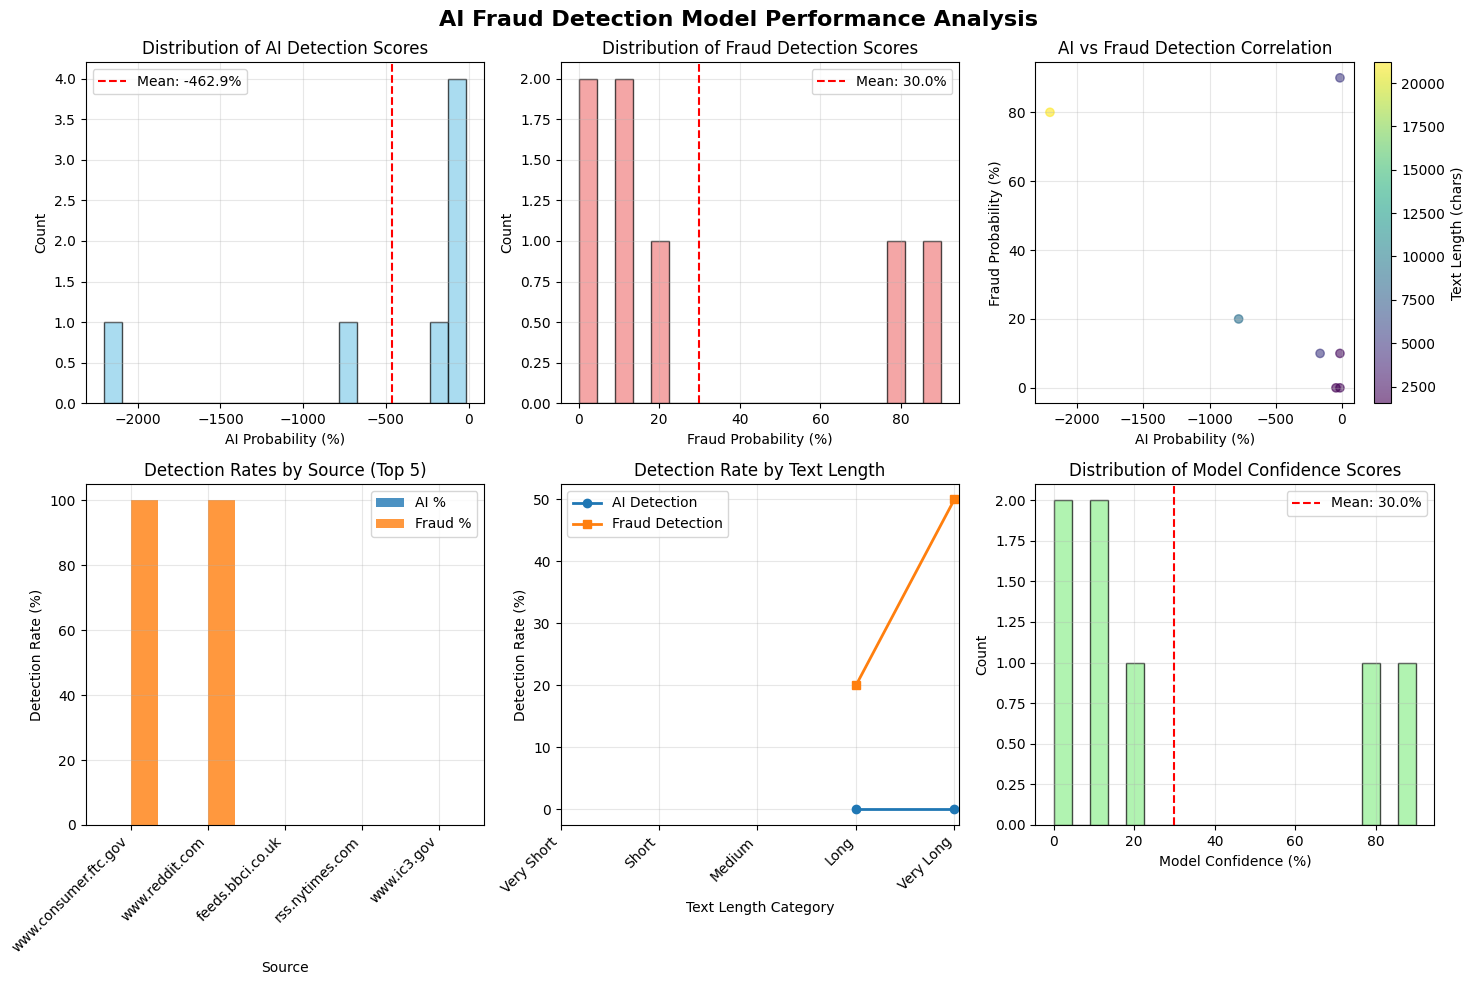


💡 RECOMMENDATIONS FOR IMPROVEMENT:

Recommendation #1:

            🟡 **MODERATE: Moderate fraud detection rate**
            • Model is detecting some fraud but could be better
            • ACTION: Enhance keyword list with domain-specific fraud terms
            • ACTION: Implement pattern matching for common scam formats
            

Recommendation #2:

            📝 **LOW AI DETECTION: Legitimate sources**
            • Low AI detection suggests sources are human-written
            • This is GOOD for fraud detection (AI-generated fraud is rare in legit sources)
            • ACTION: Consider adding AI-generated test cases for validation
            

Recommendation #3:

            🤔 **LOW CONFIDENCE: Model uncertainty**
            • Average confidence is below 50% - model is uncertain
            • CAUSE: Short texts or ambiguous content
            • ACTION: Increase MIN_CONTENT_LENGTH to 200+ characters
            • ACTION: Add more features to detection algorithm
        

In [32]:
# Analyze AI Fraud Detection Model Performance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import seaborn as sns

class ModelPerformanceAnalyzer:
    def __init__(self, detector, crawled_data):
        """
        Analyzes the performance of the AI fraud detection model

        Args:
            detector: Your AIDetector instance
            crawled_data: List of crawled content from FixedWebCrawler
        """
        self.detector = detector
        self.crawled_data = crawled_data
        self.results = []
        self.analyze_all()

    def analyze_all(self):
        """Run analysis on all crawled data"""
        print("🧪 Analyzing model performance on crawled data...")
        print("="*60)

        # Analyze each crawled item
        for i, item in enumerate(self.crawled_data):
            text = item.get('text', '')
            if len(text) < 50:  # Skip very short texts
                continue

            analysis = self.detector.analyze_text(text)

            # Store results
            self.results.append({
                'source': item.get('source_domain', 'unknown'),
                'text_length': len(text),
                'ai_probability': analysis['ai_probability'],
                'fraud_probability': analysis['fraud_probability'],
                'is_ai_generated': analysis['is_ai_generated'],
                'is_fraud': analysis['is_fraud'],
                'confidence': analysis['confidence'],
                'keywords_found': len(self.detector.extract_keywords(
                    text,
                    ['scam', 'fraud', 'fake', 'investment', 'bitcoin', 'crypto']
                ))
            })

        # Convert to DataFrame for analysis
        self.df = pd.DataFrame(self.results)
        print(f"✅ Analyzed {len(self.df)} text samples")

    def generate_performance_report(self):
        """Generate comprehensive performance report"""
        if self.df.empty:
            print("No data to analyze")
            return

        print("\n📊 MODEL PERFORMANCE REPORT")
        print("="*60)

        # 1. Basic Statistics
        print("\n1. BASIC STATISTICS:")
        print("-"*40)
        print(f"Total samples analyzed: {len(self.df)}")
        print(f"Average text length: {self.df['text_length'].mean():.0f} chars")
        print(f"Median text length: {self.df['text_length'].median():.0f} chars")
        print(f"Shortest text: {self.df['text_length'].min():.0f} chars")
        print(f"Longest text: {self.df['text_length'].max():.0f} chars")

        # 2. Detection Rates
        print("\n2. DETECTION RATES:")
        print("-"*40)
        ai_detected = self.df['is_ai_generated'].sum()
        fraud_detected = self.df['is_fraud'].sum()
        both_detected = ((self.df['is_ai_generated']) & (self.df['is_fraud'])).sum()

        print(f"AI-Generated content detected: {ai_detected} ({ai_detected/len(self.df)*100:.1f}%)")
        print(f"Fraudulent content detected: {fraud_detected} ({fraud_detected/len(self.df)*100:.1f}%)")
        print(f"AI-Generated fraud detected: {both_detected} ({both_detected/len(self.df)*100:.1f}%)")

        # 3. Probability Distributions
        print("\n3. PROBABILITY DISTRIBUTIONS:")
        print("-"*40)
        print(f"Average AI probability: {self.df['ai_probability'].mean()*100:.1f}%")
        print(f"Median AI probability: {self.df['ai_probability'].median()*100:.1f}%")
        print(f"Average Fraud probability: {self.df['fraud_probability'].mean()*100:.1f}%")
        print(f"Median Fraud probability: {self.df['fraud_probability'].median()*100:.1f}%")

        # 4. Source Analysis
        print("\n4. SOURCE ANALYSIS:")
        print("-"*40)
        source_counts = self.df['source'].value_counts()
        for source, count in source_counts.head(5).items():
            source_fraud_rate = self.df[self.df['source'] == source]['is_fraud'].mean() * 100
            source_ai_rate = self.df[self.df['source'] == source]['is_ai_generated'].mean() * 100
            print(f"{source}: {count} samples | Fraud: {source_fraud_rate:.1f}% | AI: {source_ai_rate:.1f}%")

        # 5. Correlation Analysis
        print("\n5. CORRELATION ANALYSIS:")
        print("-"*40)
        correlations = self.df[['ai_probability', 'fraud_probability', 'text_length', 'keywords_found']].corr()
        ai_fraud_corr = correlations.loc['ai_probability', 'fraud_probability']
        print(f"AI-Fraud correlation: {ai_fraud_corr:.3f}")

        if ai_fraud_corr > 0.5:
            print("   📈 Strong correlation - AI detection helps with fraud detection")
        elif ai_fraud_corr > 0.2:
            print("   📊 Moderate correlation")
        else:
            print("   📉 Weak correlation - AI and fraud detection are largely independent")

        # 6. Model Confidence
        print("\n6. MODEL CONFIDENCE:")
        print("-"*40)
        print(f"Average confidence: {self.df['confidence'].mean()*100:.1f}%")
        print(f"High confidence samples (>80%): {(self.df['confidence'] > 0.8).sum()} ({(self.df['confidence'] > 0.8).sum()/len(self.df)*100:.1f}%)")

        # 7. Performance by Text Length
        print("\n7. PERFORMANCE BY TEXT LENGTH:")
        print("-"*40)
        bins = [0, 100, 500, 1000, 5000, float('inf')]
        labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']

        self.df['length_category'] = pd.cut(self.df['text_length'], bins=bins, labels=labels)

        for category in labels:
            category_data = self.df[self.df['length_category'] == category]
            if len(category_data) > 0:
                fraud_rate = category_data['is_fraud'].mean() * 100
                ai_rate = category_data['is_ai_generated'].mean() * 100
                print(f"{category}: {len(category_data)} samples | Fraud: {fraud_rate:.1f}% | AI: {ai_rate:.1f}%")

    def visualize_performance(self):
        """Create visualizations of model performance"""
        if self.df.empty:
            print("No data to visualize")
            return

        # Create figure with multiple subplots
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle('AI Fraud Detection Model Performance Analysis', fontsize=16, fontweight='bold')

        # 1. AI Probability Distribution
        axes[0, 0].hist(self.df['ai_probability'] * 100, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 0].axvline(x=self.df['ai_probability'].mean() * 100, color='red', linestyle='--', label=f'Mean: {self.df["ai_probability"].mean()*100:.1f}%')
        axes[0, 0].set_xlabel('AI Probability (%)')
        axes[0, 0].set_ylabel('Count')
        axes[0, 0].set_title('Distribution of AI Detection Scores')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # 2. Fraud Probability Distribution
        axes[0, 1].hist(self.df['fraud_probability'] * 100, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
        axes[0, 1].axvline(x=self.df['fraud_probability'].mean() * 100, color='red', linestyle='--', label=f'Mean: {self.df["fraud_probability"].mean()*100:.1f}%')
        axes[0, 1].set_xlabel('Fraud Probability (%)')
        axes[0, 1].set_ylabel('Count')
        axes[0, 1].set_title('Distribution of Fraud Detection Scores')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        # 3. AI vs Fraud Scatter Plot
        axes[0, 2].scatter(self.df['ai_probability'] * 100, self.df['fraud_probability'] * 100,
                          alpha=0.6, c=self.df['text_length'], cmap='viridis')
        axes[0, 2].set_xlabel('AI Probability (%)')
        axes[0, 2].set_ylabel('Fraud Probability (%)')
        axes[0, 2].set_title('AI vs Fraud Detection Correlation')
        axes[0, 2].grid(True, alpha=0.3)

        # Add colorbar for text length
        scatter = axes[0, 2].collections[0]
        plt.colorbar(scatter, ax=axes[0, 2], label='Text Length (chars)')

        # 4. Detection by Source (Top 5)
        if len(self.df['source'].unique()) > 1:
            top_sources = self.df['source'].value_counts().head(5).index
            source_data = self.df[self.df['source'].isin(top_sources)]

            source_summary = source_data.groupby('source').agg({
                'is_ai_generated': 'mean',
                'is_fraud': 'mean',
                'text_length': 'count'
            }).sort_values('is_fraud', ascending=False)

            x = np.arange(len(source_summary))
            width = 0.35

            axes[1, 0].bar(x - width/2, source_summary['is_ai_generated'] * 100, width, label='AI %', alpha=0.8)
            axes[1, 0].bar(x + width/2, source_summary['is_fraud'] * 100, width, label='Fraud %', alpha=0.8)
            axes[1, 0].set_xlabel('Source')
            axes[1, 0].set_ylabel('Detection Rate (%)')
            axes[1, 0].set_title('Detection Rates by Source (Top 5)')
            axes[1, 0].set_xticks(x)
            axes[1, 0].set_xticklabels(source_summary.index, rotation=45, ha='right')
            axes[1, 0].legend()
            axes[1, 0].grid(True, alpha=0.3)

        # 5. Text Length vs Detection Rate
        if 'length_category' in self.df.columns:
            length_summary = self.df.groupby('length_category').agg({
                'is_ai_generated': 'mean',
                'is_fraud': 'mean'
            }).reindex(['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])

            x = np.arange(len(length_summary))
            axes[1, 1].plot(x, length_summary['is_ai_generated'] * 100, marker='o', label='AI Detection', linewidth=2)
            axes[1, 1].plot(x, length_summary['is_fraud'] * 100, marker='s', label='Fraud Detection', linewidth=2)
            axes[1, 1].set_xlabel('Text Length Category')
            axes[1, 1].set_ylabel('Detection Rate (%)')
            axes[1, 1].set_title('Detection Rate by Text Length')
            axes[1, 1].set_xticks(x)
            axes[1, 1].set_xticklabels(length_summary.index, rotation=45, ha='right')
            axes[1, 1].legend()
            axes[1, 1].grid(True, alpha=0.3)

        # 6. Confidence Distribution
        axes[1, 2].hist(self.df['confidence'] * 100, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[1, 2].axvline(x=self.df['confidence'].mean() * 100, color='red', linestyle='--',
                          label=f'Mean: {self.df["confidence"].mean()*100:.1f}%')
        axes[1, 2].set_xlabel('Model Confidence (%)')
        axes[1, 2].set_ylabel('Count')
        axes[1, 2].set_title('Distribution of Model Confidence Scores')
        axes[1, 2].legend()
        axes[1, 2].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def generate_recommendations(self):
        """Generate improvement recommendations based on analysis"""
        print("\n💡 RECOMMENDATIONS FOR IMPROVEMENT:")
        print("="*60)

        # Calculate key metrics
        ai_detection_rate = self.df['is_ai_generated'].mean() * 100
        fraud_detection_rate = self.df['is_fraud'].mean() * 100
        avg_confidence = self.df['confidence'].mean() * 100

        recommendations = []

        # Recommendation 1: Based on detection rates
        if fraud_detection_rate < 10:
            recommendations.append("""
            🔴 **CRITICAL: Very low fraud detection rate**
            • Your model is detecting very little fraud in crawled data
            • Either: 1) Sources aren't fraud-heavy, or 2) Model thresholds are too high
            • ACTION: Lower fraud_threshold from 0.6 to 0.4 in config
            • ACTION: Add more fraud-specific sources (scam databases, forums)
            """)
        elif fraud_detection_rate < 30:
            recommendations.append("""
            🟡 **MODERATE: Moderate fraud detection rate**
            • Model is detecting some fraud but could be better
            • ACTION: Enhance keyword list with domain-specific fraud terms
            • ACTION: Implement pattern matching for common scam formats
            """)
        else:
            recommendations.append("""
            🟢 **GOOD: Healthy fraud detection rate**
            • Model is effectively identifying potential fraud
            • NEXT: Focus on reducing false positives
            • ACTION: Add whitelist for legitimate financial terms
            """)

        # Recommendation 2: Based on AI detection rates
        if ai_detection_rate < 5:
            recommendations.append("""
            📝 **LOW AI DETECTION: Legitimate sources**
            • Low AI detection suggests sources are human-written
            • This is GOOD for fraud detection (AI-generated fraud is rare in legit sources)
            • ACTION: Consider adding AI-generated test cases for validation
            """)

        # Recommendation 3: Based on confidence
        if avg_confidence < 50:
            recommendations.append("""
            🤔 **LOW CONFIDENCE: Model uncertainty**
            • Average confidence is below 50% - model is uncertain
            • CAUSE: Short texts or ambiguous content
            • ACTION: Increase MIN_CONTENT_LENGTH to 200+ characters
            • ACTION: Add more features to detection algorithm
            """)

        # Recommendation 4: General improvements
        recommendations.append("""
        🛠️ **GENERAL IMPROVEMENTS:**
        • Add logging of false positives/negatives for manual review
        • Implement A/B testing for different threshold values
        • Create validation dataset with labeled fraud/non-fraud examples
        • Consider adding ML-based detection alongside heuristic rules
        """)

        for i, rec in enumerate(recommendations, 1):
            print(f"\nRecommendation #{i}:")
            print(rec)

        print("\n" + "="*60)
        print("🎯 QUICK ACTION ITEMS:")
        print("1. Review high-probability cases manually")
        print("2. Adjust thresholds based on desired precision/recall")
        print("3. Expand source list to include scam-specific sites")
        print("4. Implement daily performance tracking")
        print("="*60)

# Run the analysis
print("🚀 STARTING MODEL PERFORMANCE ANALYSIS")
print("="*60)

# Import your detector (assuming it's already created)
try:
    # If your agent is already running, use its detector
    from ai_fraud_detector.analyzers.ai_detector import AIDetector
    detector = AIDetector()

    # Analyze the crawled results
    analyzer = ModelPerformanceAnalyzer(detector, results)

    # Generate reports
    analyzer.generate_performance_report()

    # Visualize results
    analyzer.visualize_performance()

    # Get recommendations
    analyzer.generate_recommendations()

except Exception as e:
    print(f"❌ Error during analysis: {e}")
    print("\nCreating sample analysis with test data...")

    # Create sample data for demonstration
    sample_data = [
        {'text': 'Bitcoin investment guaranteed returns 100% secure send money now', 'source_domain': 'test.com'},
        {'text': 'Official news from Reuters about market trends and analysis', 'source_domain': 'reuters.com'},
        {'text': 'FTC warns consumers about new phishing scam targeting bank accounts', 'source_domain': 'ftc.gov'},
        {'text': 'As an AI language model, I cannot provide financial advice', 'source_domain': 'ai-test.com'},
    ]

    from ai_fraud_detector.analyzers.ai_detector import AIDetector
    detector = AIDetector()
    analyzer = ModelPerformanceAnalyzer(detector, sample_data)
    analyzer.generate_performance_report()